In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm 
import requests
from io import StringIO
import seaborn as sns; sns.set() 
from matplotlib.dates import YearLocator, MonthLocator 
from matplotlib import cm 
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

import FinanceDataReader as fdr


stock_list = ['005930', '035720', '005380']
stock_list=['240810', '067280', '086390', '042510', '001820', '033290', '232140', '215200', '255440', '002700']

# 종목 코드 리스트를 순회하면서 종가 데이터를 가져오기
close_dict = {}  # 종가 데이터를 저장할 딕셔너리
for stock_code in stock_list:
    df_close = fdr.DataReader(stock_code, '2011-01-01', '2019-12-31')['Close']
    close_dict[stock_code] = df_close

# 종가 데이터가 저장된 딕셔너리를 DataFrame으로 변환하기
df_close_all = pd.DataFrame(close_dict)


In [ ]:
df_close_all

,005930,035720,005380
Date,,,
2011-01-03,19160,15415,177000
2011-01-04,19160,15575,178000
2011-01-05,18840,15655,189000
2011-01-06,18600,15696,194000
2011-01-07,18420,16077,198000
...,...,...,...
2019-12-23,55500,29806,122500
2019-12-24,55000,29405,122000
2019-12-26,55400,29706,122500


In [ ]:
ret=pd.DataFrame()
realized_vol=pd.DataFrame()

for i in df_close_all.columns:
  ret[i]=(df_close_all[i]/df_close_all[i].shift(1))-1
  


ret.dropna(inplace=True)  
    # ret[i] = 100*(df_close_all[i].pct_change()[1:])
    # realized_vol[i] = ret[i].rolling(5).std()

In [ ]:
ret.head()

,005930,035720,005380
Date,,,
2011-01-04,0.000000,0.010380,0.005650
2011-01-05,-0.016701,0.005136,0.061798
2011-01-06,-0.012739,0.002619,0.026455
2011-01-07,-0.009677,0.024274,0.020619
2011-01-10,-0.004343,-0.010014,0.000000


In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hmmlearn import hmm 
hmm_model=hmm.GaussianHMM(n_components=3,
                          covariance_type='full',
                          n_iter=100) 


In [ ]:
import copy
hmm_predict=[]
df_hmmcolumns_list=copy.deepcopy(stock_list)
hmm_models=[]
for i in ret.columns:
  hmm_model.fit(ret[i].values.reshape(-1,1)) 
  hmm_predict.append(hmm_model.predict(np.array(ret[i].dropna()).reshape(-1,1)))
  hmm_models.append(hmm_model)

for i in range(len(df_hmmcolumns_list)):
  df_hmmcolumns_list[i]=df_hmmcolumns_list[i]+'states'

df_hmm = pd.DataFrame(hmm_predict).T
df_hmm.index = ret.index
#데이터프레임의 배열 변경
#다르게 만드는 방법이 있을텐데 시간없고 귀찮아서 .T썼다


# stock_list = ['005930', '035720', '005380']
df_hmm.columns=df_hmmcolumns_list


# for i in range(len(realized_vol.columns)):
#   clf.fit(X.loc[X.index[:-n], (X.columns[i], X.columns[i+3])].values,realized_vol.iloc[1:-(n-1),i].values.reshape(-1,))
#   #추가로 설명을 하겠는데 데이터프레임 X를 만들면서  칼럼수가 종목수*2배가 되었다  
#   #i는 종목수이다  본 코드에서는 3종목을 기준으로 작성되었으므로 i+3이다 분석할 종목수만큼+값을 지정하면 문제 없다 
#   predict_svr_lin.append(clf.predict(X.loc[X.index[-n:], (X.columns[i], X.columns[i+3])]))








In [ ]:
df_hmm 

,005930states,035720states,005380states
Date,,,
2011-01-04,1,1,2
2011-01-05,1,1,0
2011-01-06,1,1,0
2011-01-07,1,1,0
2011-01-10,1,1,0
...,...,...,...
2019-12-23,1,1,1
2019-12-24,1,1,2
2019-12-26,1,1,1


In [ ]:
ret.head()

,005930,035720,005380
Date,,,
2011-01-04,0.000000,0.010380,0.005650
2011-01-05,-0.016701,0.005136,0.061798
2011-01-06,-0.012739,0.002619,0.026455
2011-01-07,-0.009677,0.024274,0.020619
2011-01-10,-0.004343,-0.010014,0.000000


In [ ]:
print(df_hmm, ret)

            005930states  035720states  005380states
Date                                                
2011-01-04             1             1             2
2011-01-05             1             1             0
2011-01-06             1             1             0
2011-01-07             1             1             0
2011-01-10             1             1             0
...                  ...           ...           ...
2019-12-23             1             1             1
2019-12-24             1             1             2
2019-12-26             1             1             1
2019-12-27             1             0             2
2019-12-30             1             1             1

[2214 rows x 3 columns]               005930    035720    005380
Date                                    
2011-01-04  0.000000  0.010380  0.005650
2011-01-05 -0.016701  0.005136  0.061798
2011-01-06 -0.012739  0.002619  0.026455
2011-01-07 -0.009677  0.024274  0.020619
2011-01-10 -0.004343 -0.010014  0.000000

In [ ]:
ret_merged=pd.concat([df_hmm, ret],
                     axis=1)
# ret_merged.drop('Date', axis=1,inplace=True)
ret_merged.reset_index(drop=True,inplace=True)
ret_merged.head()
# print(ret_merged)

,005930states,035720states,005380states,005930,035720,005380
0,1,1,2,0.000000,0.010380,0.005650
1,1,1,0,-0.016701,0.005136,0.061798
2,1,1,0,-0.012739,0.002619,0.026455
3,1,1,0,-0.009677,0.024274,0.020619
4,1,1,0,-0.004343,-0.010014,0.000000


In [ ]:
for i in range(int(len(ret_merged.columns)/2)):
  print(ret_merged.iloc[:,i].value_counts())

1    1362
0     674
2     178
Name: 005930states, dtype: int64
1    1349
2     777
0      88
Name: 035720states, dtype: int64
2    1004
1     912
0     298
Name: 005380states, dtype: int64


In [ ]:
state_means_df = pd.DataFrame()
state_std_df=pd.DataFrame()
for i in range(int(len(ret_merged.columns)/2)): 
    col = ret_merged.columns[i+int(len(ret_merged.columns)/2)] 
    state_means_list = []
    state_std_list = []
    for j in range(3):
        state_means = np.mean(ret_merged[ret_merged.iloc[:,i]==j][col])
        state_means_list.append(state_means)
        state_std = np.std(ret_merged[ret_merged.iloc[:,i]==j][col])
        state_std_list.append(state_std)    
    state_means_df = pd.concat([state_means_df, pd.Series(state_means_list)], axis=1)
    state_std_df = pd.concat([state_std_df, pd.Series(state_std_list)], axis=1)
    
state_means_df.columns=stock_list
state_std_df.columns=stock_list
print(state_means_df)
print(state_std_df)

     005930    035720    005380
0  0.000560  0.017885  0.000292
1  0.000084 -0.000862  0.001542
2  0.005032  0.001126 -0.001463
     005930    035720    005380
0  0.021681  0.046543  0.029931
1  0.010755  0.013969  0.020972
2  0.030032  0.030335  0.012087


In [ ]:
for i in range(3):
  print(f'HMM means\n {stock_list[i],hmm_models[i].means_}')
  print(f'HMM covariances\n {stock_list[i],hmm_models[i].means_}')
  print(f'HMM transition matrix\n {stock_list[i],hmm_models[i].means_}')
  print(f'HMM initial probability\n {stock_list[i],hmm_models[i].means_}')




HMM means
 ('005930', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM covariances
 ('005930', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM transition matrix
 ('005930', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM initial probability
 ('005930', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM means
 ('035720', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM covariances
 ('035720', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM transition matrix
 ('035720', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM initial probability
 ('035720', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM means
 ('005380', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM covariances
 ('005380', array([[ 0.00077986],
       [ 0.00167509],
       [-0.00117684]]))
HMM transition matrix
 ('00538

In [ ]:
# import copy
# hmm_predict=[]
# df_hmmcolumns_list=copy.deepcopy(stock_list)
# hmm_models=[]
# for i in ret.columns:
#   hmm_model.fit(np.array(ret[i].dropna()).reshape(-1,1)) 
#   hmm_predict.append(hmm_model.predict(np.array(ret[i].dropna()).reshape(-1,1)))
#   hmm_models.append(hmm_model)

# for i in range(len(df_hmmcolumns_list)):
#   df_hmmcolumns_list[i]=df_hmmcolumns_list[i]+'states'

# df_hmm = pd.DataFrame(hmm_predict).T
# df_hmm.index = ret.index
# #데이터프레임의 배열 변경
# #다르게 만드는 방법이 있을텐데 시간없고 귀찮아서 .T썼다


# # stock_list = ['005930', '035720', '005380']
# df_hmm.columns=df_hmmcolumns_list


# n_components=np.arage(1,10)
# clusters=[hmm.GaussianHMM(n_components=n, covariance_type='full').fit(ret)]

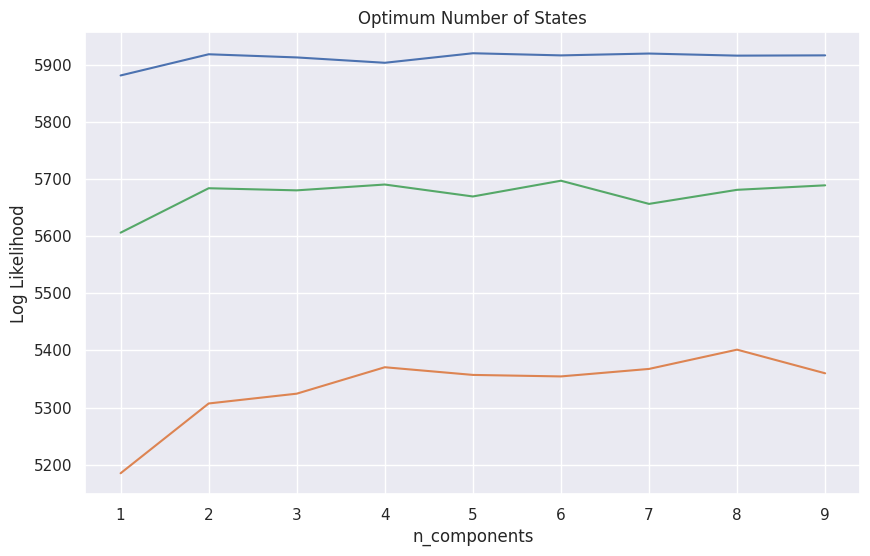

In [ ]:
ret=ret.dropna()
n_components = np.arange(1, 10)

for i in range(len(ret.columns)):
  ret_temp=ret.iloc[:,i].values.reshape(-1,1)

  clusters = [hmm.GaussianHMM(n_components=n,covariance_type="full").fit(ret_temp)for n in n_components]
  plt.plot(n_components, [m.score(ret_temp) for m in clusters])
  plt.title('Optimum Number of States')
  plt.xlabel('n_components')
  plt.ylabel('Log Likelihood')

In [ ]:

hmm_predict=[]
df_hmmcolumns_list=copy.deepcopy(stock_list)
hmm_models=[]
hidden_states=[]
for i in ret.columns:
  ret_temp=ret[i].dropna().values.reshape(-1,1)
  hmm_model.fit(np.array(ret[i].dropna()).reshape(-1,1))
  hmm_models.append(hmm.GaussianHMM(n_components=3,
                          covariance_type='full').fit(ret_temp))
  hidden_states.append(hmm_model.predict(ret_temp))
  # hmm_predict.append(hmm_model.predict(np.array(ret[i].dropna()).reshape(-1,1)))
  # hmm_models.append(hmm_model)

for i in range(len(df_hmmcolumns_list)):
  df_hmmcolumns_list[i]=df_hmmcolumns_list[i]+'states'

df_opthmm = pd.DataFrame(hidden_states).T
df_opthmm.index = ret.index
#데이터프레임의 배열 변경
#다르게 만드는 방법이 있을텐데 시간없고 귀찮아서 .T썼다


# stock_list = ['005930', '035720', '005380']
df_opthmm.columns=df_hmmcolumns_list


# n_components=np.arage(1,10)
# clusters=[hmm.GaussianHMM(n_components=n, covariance_type='full').fit(ret)]



In [ ]:
df_opthmm

,005930states,035720states,005380states
Date,,,
2011-01-04,2,0,0
2011-01-05,2,0,1
2011-01-06,2,0,1
2011-01-07,2,0,1
2011-01-10,2,0,1
...,...,...,...
2019-12-23,2,0,2
2019-12-24,2,0,2
2019-12-26,2,0,2


In [ ]:
# for i in range(int(len(ret_merged.columns)/2)):
#   print(ret_merged.iloc[:,i].value_counts())


for i in range(len(df_opthmm.columns)):
  print(df_opthmm.iloc[:,i].value_counts())

2    2092
1     105
0      17
Name: 005930states, dtype: int64
0    1433
1     724
2      57
Name: 035720states, dtype: int64
2    2018
1     173
0      23
Name: 005380states, dtype: int64


In [ ]:
ret.head()

,005930,035720,005380
Date,,,
2011-01-04,0.000000,0.010380,0.005650
2011-01-05,-0.016701,0.005136,0.061798
2011-01-06,-0.012739,0.002619,0.026455
2011-01-07,-0.009677,0.024274,0.020619
2011-01-10,-0.004343,-0.010014,0.000000


In [ ]:
ret=ret.dropna()


opthmm_predict=[]
df_hmmcolumns_list=copy.deepcopy(stock_list)
hmm_optmodels=[]
hidden_optstates=[]
for i in ret.columns:
  ret_temp=ret[i].dropna().values.reshape(-1,1)
  hmm_model.fit(ret_temp)
  hmm_optmodels.append(hmm.GaussianHMM(n_components=3,
                          covariance_type='full').fit(ret_temp))
  hidden_optstates.append(hmm_model.predict(ret_temp))
  # hmm_predict.append(hmm_model.predict(np.array(ret[i].dropna()).reshape(-1,1)))
  # hmm_models.append(hmm_model)

for i in range(len(df_hmmcolumns_list)):
  df_hmmcolumns_list[i]=df_hmmcolumns_list[i]+'states'

df_opthmm = pd.DataFrame(hidden_optstates).T
df_opthmm.index = ret.index
#데이터프레임의 배열 변경
#다르게 만드는 방법이 있을텐데 시간없고 귀찮아서 .T썼다


# stock_list = ['005930', '035720', '005380']
df_opthmm.columns=df_hmmcolumns_list


# n_components=np.arage(1,10)
# clusters=[hmm.GaussianHMM(n_components=n, covariance_type='full').fit(ret)]



In [ ]:
len(df_opthmm.columns)   #=df_hmmcolumns_list

3

In [ ]:
len(hidden_optstates)

3

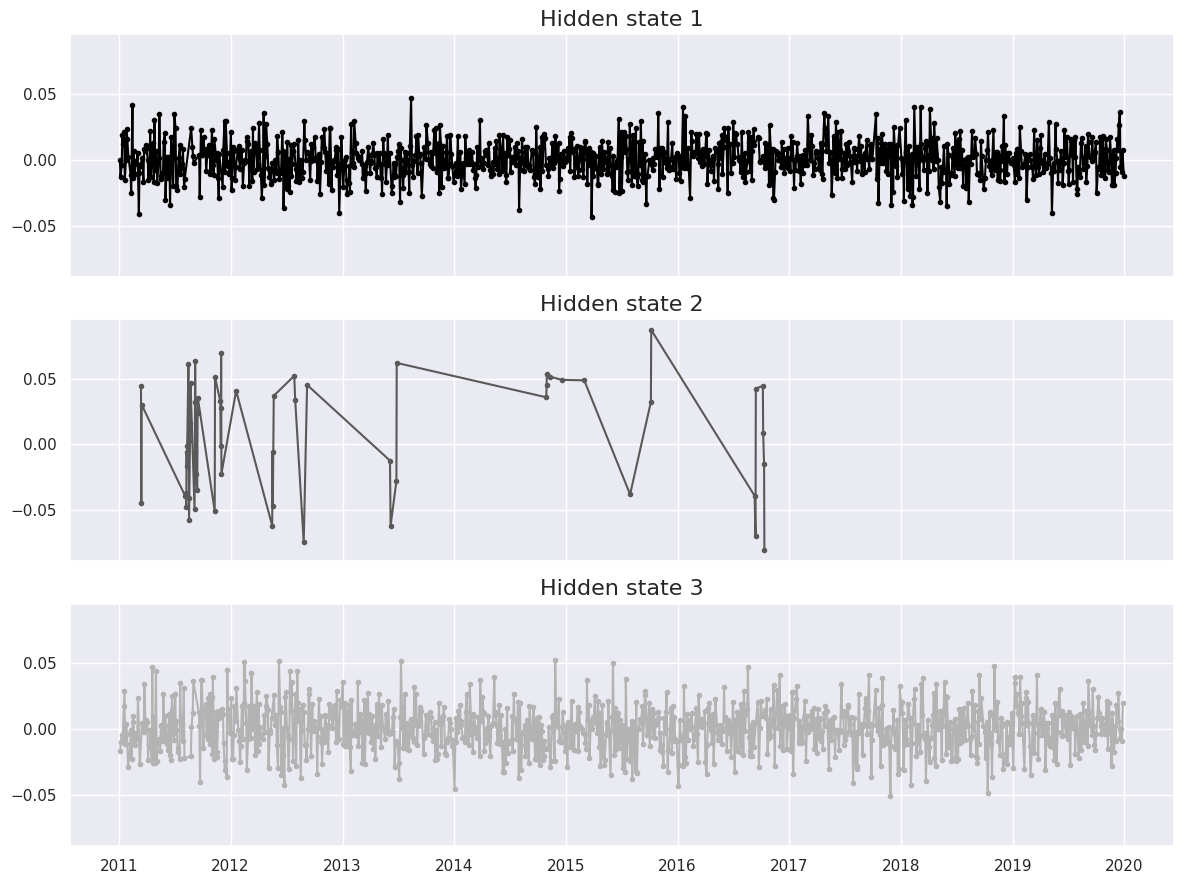

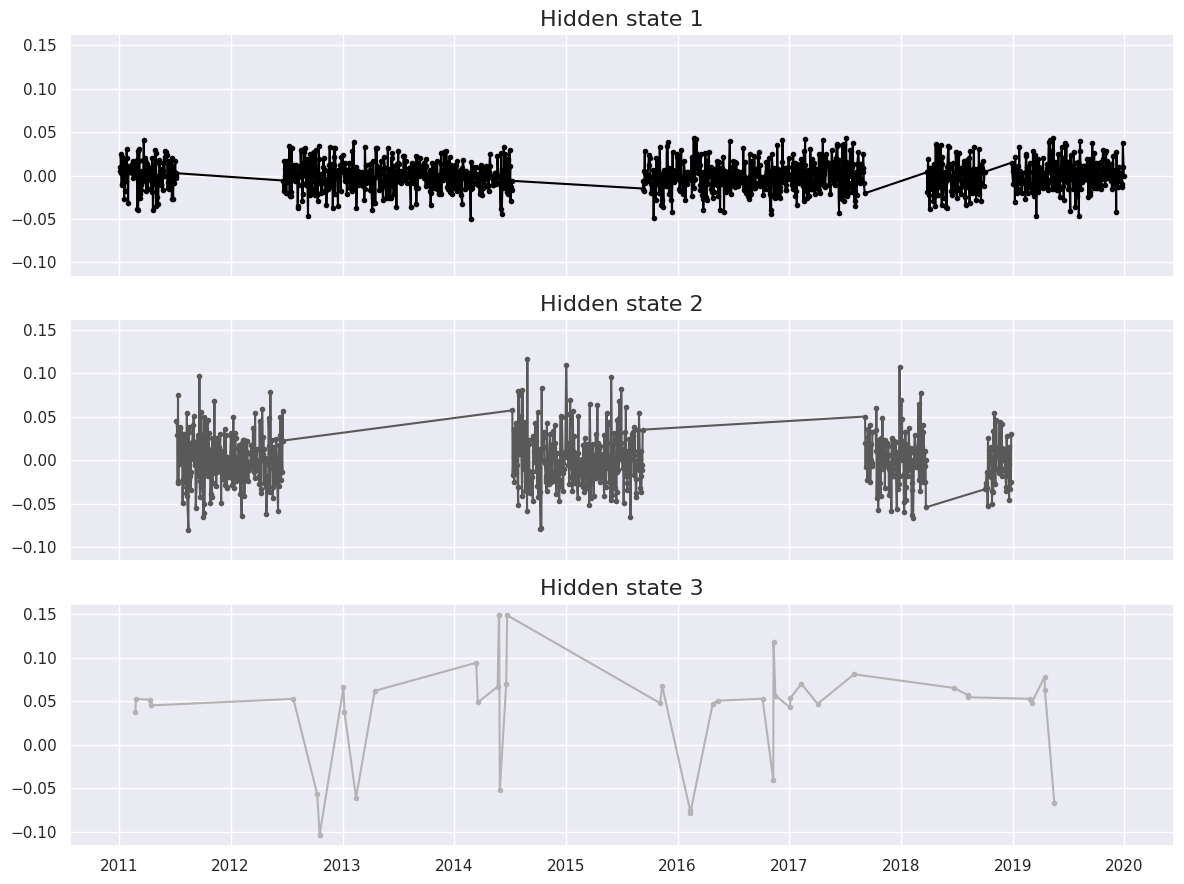

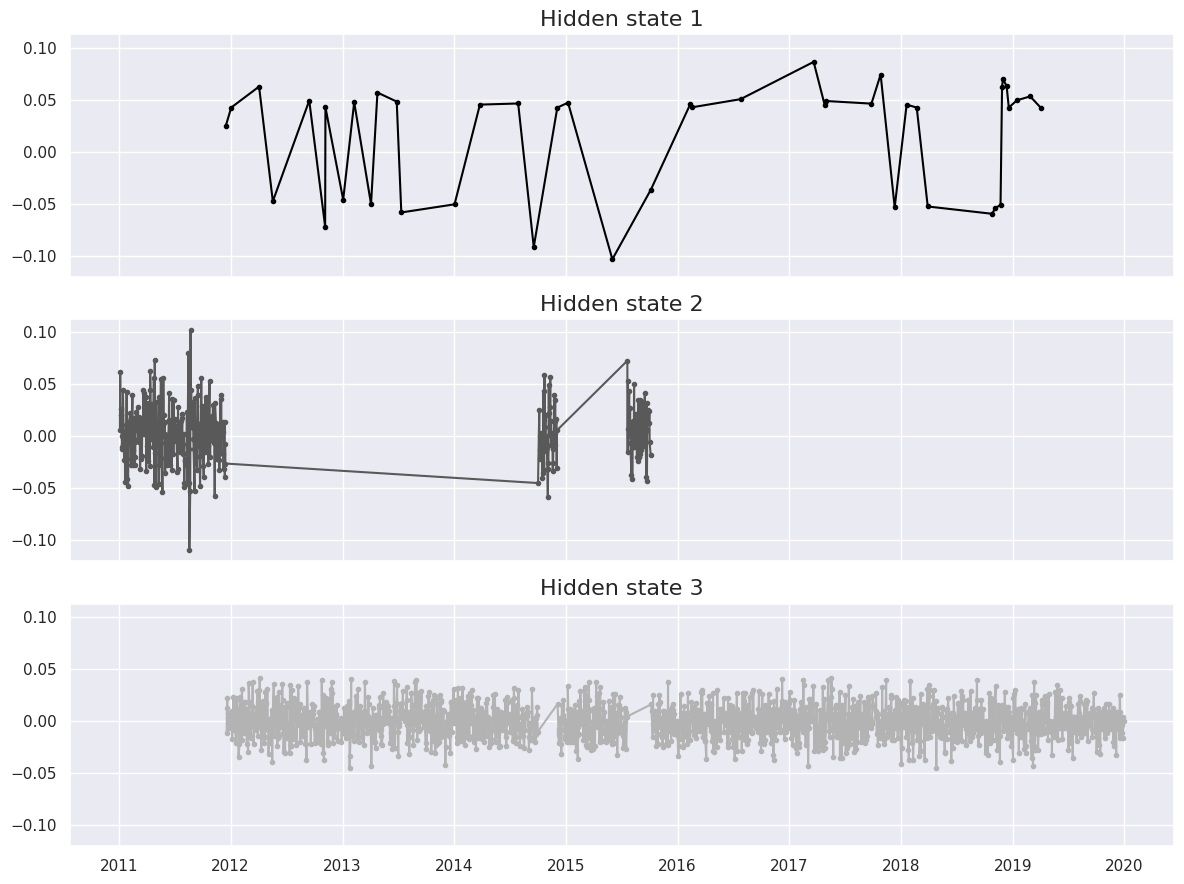

In [ ]:
from matplotlib.dates import YearLocator, MonthLocator
from matplotlib import cm

for i in range(len(hmm_optmodels)):

  fig, axs=plt.subplots(hmm_optmodels[i].n_components, sharex=True, sharey=True, figsize=(12,9))
  colors=cm.gray(np.linspace(0,0.7,hmm_optmodels[i].n_components)) 
  for j, (ax, color) in enumerate(zip(axs, colors)):
    mask=hidden_optstates[i]==j
    ax.plot_date(ret.index.values[mask],
                 ret.iloc[:,i].values[mask],
                 ".-", c=color)
    ax.set_title('Hidden state {}'.format(j+1), fontsize=16)
    ax.xaxis.set_minor_locator(MonthLocator())

  plt.tight_layout()

In [ ]:
state_means_df = pd.DataFrame()
state_std_df=pd.DataFrame()
for i in range(int(len(ret_merged.columns)/2)): 
    col = ret_merged.columns[i+int(len(ret_merged.columns)/2)] 
    state_means_list = []
    state_std_list = []
    for j in range(3):
        state_means = np.mean(ret_merged[ret_merged.iloc[:,i]==j][col])
        state_means_list.append(state_means)
        state_std = np.std(ret_merged[ret_merged.iloc[:,i]==j][col])
        state_std_list.append(state_std)    
    state_means_df = pd.concat([state_means_df, pd.Series(state_means_list)], axis=1)
    state_std_df = pd.concat([state_std_df, pd.Series(state_std_list)], axis=1)
    
state_means_df.columns=stock_list
state_std_df.columns=stock_list
print(state_means_df)
print(state_std_df)

     005930    035720    005380
0  0.000560  0.017885  0.000292
1  0.000084 -0.000862  0.001542
2  0.005032  0.001126 -0.001463
     005930    035720    005380
0  0.021681  0.046543  0.029931
1  0.010755  0.013969  0.020972
2  0.030032  0.030335  0.012087


In [ ]:
df_close_all_return=pd.DataFrame()

for i in df_close_all.columns:
  df_close_all_return[i]=df_close_all[i].pct_change()
  df_close_all_return.dropna(inplace=True)


df_close_all_return


split=int(len(df_close_all_return)*0.90) 
train_ret_df=df_close_all_return.iloc[:split].dropna()
test_ret_df=df_close_all_return.iloc[split:].dropna()



In [ ]:
df_close_all_return

,005930,035720,005380
Date,,,
2011-01-04,0.000000,0.010380,0.005650
2011-01-05,-0.016701,0.005136,0.061798
2011-01-06,-0.012739,0.002619,0.026455
2011-01-07,-0.009677,0.024274,0.020619
2011-01-10,-0.004343,-0.010014,0.000000
...,...,...,...
2019-12-23,-0.008929,-0.009998,-0.012097
2019-12-24,-0.009009,-0.013454,-0.004082
2019-12-26,0.007273,0.010236,0.004098


In [ ]:
print(train, test)

Empty DataFrame
Columns: [240810, 067280, 086390, 042510, 001820, 033290, 232140, 215200, 255440, 002700]
Index: []               240810    067280    086390    042510    001820    033290  \
Date                                                                     
2017-10-10  0.038123  0.000000  0.000000  0.007339  0.022403 -0.044860   
2017-10-11  0.042373 -0.010638  0.013274  0.023679  0.009960  0.019569   
2017-10-12 -0.012195 -0.001536  0.004367  0.001779 -0.029586  0.088292   
2017-10-13 -0.041152  0.006154 -0.021739 -0.008881 -0.075203 -0.033510   
2017-10-16 -0.098712  0.003058 -0.035556 -0.025090  0.006593 -0.016423   
...              ...       ...       ...       ...       ...       ...   
2019-12-23 -0.016224  0.016616 -0.021277 -0.023050 -0.015432 -0.030521   
2019-12-24 -0.004498  0.014859 -0.003623 -0.012704 -0.004180 -0.022222   
2019-12-26  0.070783  0.010249  0.065455 -0.001838  0.019937  0.034091   
2019-12-27  0.019691 -0.008696 -0.006826  0.001842  0.069959  0.056777

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   240810  0 non-null      float64
 1   067280  0 non-null      float64
 2   086390  0 non-null      float64
 3   042510  0 non-null      float64
 4   001820  0 non-null      float64
 5   033290  0 non-null      float64
 6   232140  0 non-null      float64
 7   215200  0 non-null      float64
 8   255440  0 non-null      float64
 9   002700  0 non-null      float64
dtypes: float64(10)
memory usage: 108.0+ bytes


In [ ]:
hmmreturn_model=hmm.GaussianHMM(n_components=3, covariance_type='full', n_iter=1000000,init_params='')
predictions=pd.DataFrame()


for i in df_close_all_return.columns:
  predict=[]
  hmmreturn_model.fit(train_ret_df[i].values.reshape(-1,1))
  for j in range(len(test_ret_df)):
    
    adjustment=np.dot(hmmreturn_model.transmat_, hmmreturn_model.means_) 
    predict.append(test_ret_df[i].iloc[j]+adjustment[0])
  predictions=pd.concat([predictions, pd.Series(predict)], axis=1)

predictions.columns=stock_list
# state_means_df.columns=stock_list
# state_std_df.columns=stock_list  

In [ ]:
predictions

,005930,035720,005380
0,[-0.029058667007310045],[-0.00785606046096757],[-0.0020036079403470473]
1,[0.005708649010006041],[-0.02628773851443381],[0.017900901007986574]
2,[0.02457769662905366],[0.004365552212361648],[0.00980778328280884]
3,[0.004501692285948246],[0.022097878255700056],[-0.029163758641353794]
4,[0.029382891434248472],[0.024675710933748176],[-0.022131739514261735]
...,...,...,...
217,[-0.0076842081328511655],[-0.009801395208905469],[-0.01013212816564147]
218,[-0.007764645713288797],[-0.013257387296496977],[-0.0021169866251543666]
219,[0.008517090568447551],[0.010432634111909504],[0.00606300668364456]
220,[0.021099958963590328],[0.037360489001062674],[-0.014361884584337965]


In [ ]:
std_dev_df=pd.DataFrame()
sharpe_df=pd.DataFrame()
for i in df_close_all_return.columns:
  std_dev=[]
  sharpe=[]
  std_dev.append(predictions[i].std())
  std_dev_df=pd.concat([std_dev_df, pd.Series(std_dev)],axis=1)
  sharpe.append(predictions[i].mean()/std_dev)
  sharpe_df=pd.concat([sharpe_df, pd.Series(sharpe)], axis=1)




std_dev_df.columns=stock_list
sharpe_df.columns=stock_list




In [ ]:
print(sharpe_df)

                  005930                 035720                005380
0  [0.15617232580077503]  [0.12794045972211188]  [0.1276736263324849]


In [ ]:
df_close_all

,005930,035720,005380
Date,,,
2011-01-03,19160,15415,177000
2011-01-04,19160,15575,178000
2011-01-05,18840,15655,189000
2011-01-06,18600,15696,194000
2011-01-07,18420,16077,198000
...,...,...,...
2019-12-23,55500,29806,122500
2019-12-24,55000,29405,122000
2019-12-26,55400,29706,122500
